## Graph Neural Network Property Predictor


## Imports

In [1]:
# Main Imports
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

# Profiling
import cProfile
import pstats
from pstats import SortKey

# Import Local Files
from model import GNN
from utils.config import FEATURE_NAMES, RESIDUAL_G_FEATURES, MODEL_CONFIG
import utils.data_utils as DataUtils
import utils.visualization as Visualization

c:\Users\Will\miniforge3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Execution

In [2]:
# Profile the main training routine
# profiler = cProfile.Profile()
# profiler.enable()

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Select target feature for analysis
target_feature = "GMinus_Density"

# Make sure the user only selects a feature in P(G/G')
if target_feature not in RESIDUAL_G_FEATURES:
    raise ValueError(
        f"Invalid target feature: {target_feature}\n"
        f"Target feature must be one of the following G/G' metrics:\n"
        f"{', '.join(RESIDUAL_G_FEATURES)}"
    )

target_idx = RESIDUAL_G_FEATURES.index(target_feature)

# Generate different graphs for training and test to test generalization
print("Generating graphs...")
G_train, selected_nodes_train = DataUtils.generate_graph(num_nodes=1000, edge_prob=0.2)
G_test, selected_nodes_test = DataUtils.generate_graph(num_nodes=1000, edge_prob=0.2)

print(f"Train graph: {len(G_train)} nodes, {G_train.number_of_edges()} edges")
print(f"Test graph: {len(G_test)} nodes, {G_test.number_of_edges()} edges")

print("\nProcessing graph data...")
train_data = DataUtils.process_graph_data(G_train, selected_nodes_train, target_idx)
test_data = DataUtils.process_graph_data(G_test, selected_nodes_test, target_idx)

# Initialize Model
print("\nInitializing model...")
node_feature_dim = train_data.x.shape[1]
print(f"Node feature dimension: {node_feature_dim}")
print(f"FEATURE_NAMES length: {len(FEATURE_NAMES)}")

# Make sure the dimensions match
if node_feature_dim != len(FEATURE_NAMES):
    print(f"Warning: Feature dimension mismatch! Expected {len(FEATURE_NAMES)}, got {node_feature_dim}")

model = GNN(node_feature_dim=len(FEATURE_NAMES))
# print(f"Model parameters: {sum(p.numel() for p in model.parameters())}")

# # Print model configuration
# print("\nModel configuration:")
# for k, v in MODEL_CONFIG.items():
#     print(f"  {k}: {v}")

# Train model
print("\nTraining model...")
losses, trained_model, feature_stats = model.train_model(
    model, 
    train_data=train_data,
    test_data=test_data, 
    target_idx=target_idx
)

# Calculate elapsed time and profiling results
# profiler.disable()
# print("\nProfiling Results:")
# stats = pstats.Stats(profiler).sort_stats(SortKey.TIME)
# stats.print_stats(20)  # Show top 20 time-consuming functions



Generating graphs...
Train graph: 1000 nodes, 99851 edges
Test graph: 1000 nodes, 99588 edges

Processing graph data...

Initializing model...
Node feature dimension: 11
FEATURE_NAMES length: 11

Training model...


c:\Users\Will\miniforge3\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(



Feature Statistics (Initial):
Target Feature: GMinus_Density

Train Graph:
Min degree in G/G': 161
Num nodes in G/G': 996

Test Graph:
Min degree in G/G': 162
Num nodes in G/G': 996

Training Progress:
Epoch   0: Train Loss = 1.6568, Test Loss = 1.2201, Time = 29.47s
Epoch   1: Train Loss = 1.4192, Test Loss = 0.6438, Time = 29.13s
Epoch   2: Train Loss = 1.2740, Test Loss = 0.2524, Time = 29.89s
Epoch   3: Train Loss = 1.1272, Test Loss = 0.0727, Time = 29.47s
Epoch   4: Train Loss = 1.0996, Test Loss = 0.0213, Time = 29.57s
Epoch   5: Train Loss = 1.1828, Test Loss = 0.2069, Time = 29.44s
Epoch   6: Train Loss = 1.1296, Test Loss = 0.5609, Time = 29.21s
Epoch   7: Train Loss = 1.1446, Test Loss = 0.9076, Time = 29.54s
Epoch   8: Train Loss = 1.1641, Test Loss = 0.9928, Time = 29.43s
Epoch   9: Train Loss = 1.0603, Test Loss = 0.9518, Time = 29.61s
Epoch  10: Train Loss = 1.0614, Test Loss = 0.8541, Time = 29.81s
Epoch  11: Train Loss = 0.9626, Test Loss = 0.6433, Time = 29.46s
Epoch

## Visualization

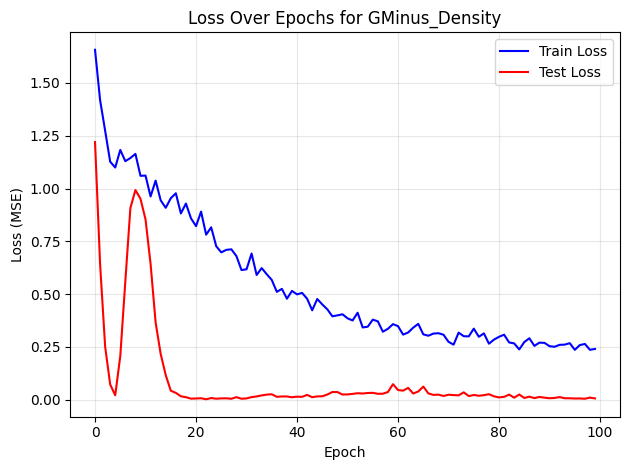


Model Predictions Analysis:
Using 100 sampled target values from training
Average prediction: 0.327829
Average actual value: 0.199661
Std dev of actual values: 0.000268
Average absolute error: 0.128168
Standard deviation of predictions: 0.405439


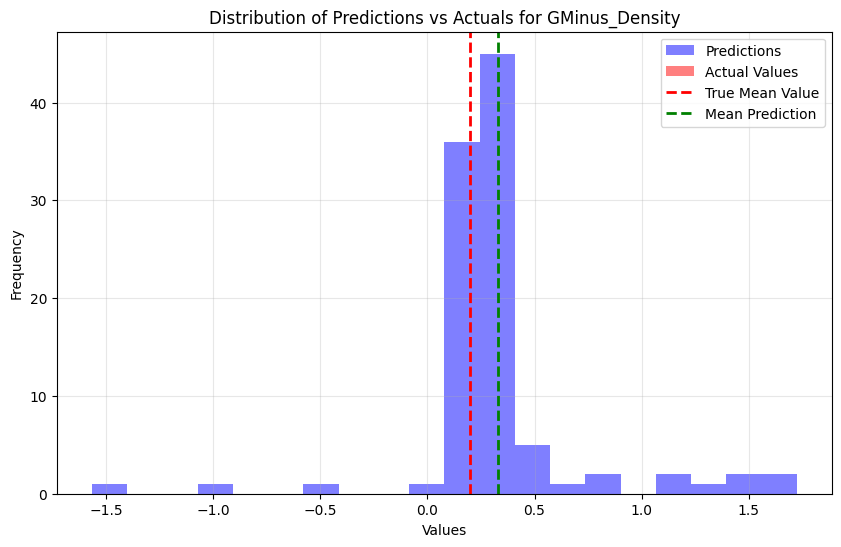

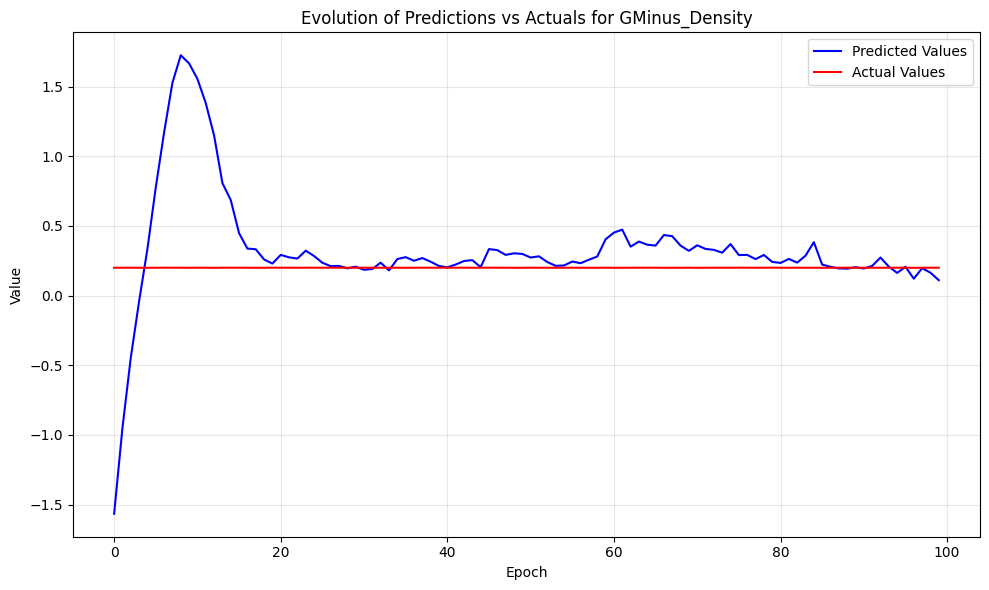


=== Node Feature Statistics ===
                 Feature     Mean      Min      Max  Std Dev  Variance  All Identical
      Node_Metric_Degree 0.828639 0.668050 1.000000 0.051099  0.002611          False
  Node_Metric_Clustering 0.200763 0.121053 0.294737 0.028913  0.000836          False
 Node_Metric_NeighborDeg 0.831785 0.818519 0.841045 0.003006  0.000009          False
 Node_Metric_Betweenness 0.008064 0.000000 0.025144 0.003778  0.000014          False
   Node_Metric_Closeness 5.163584 4.340249 6.000000 0.264479  0.069949          False
    Node_Metric_PageRank 0.010000 0.008324 0.011714 0.000524  0.000000          False
  Node_Metric_CoreNumber 0.999547 0.936047 1.000000 0.004002  0.000016          False
    Node_Metric_LocalEff 0.319861 0.314954 0.324653 0.001622  0.000003          False
 Node_Metric_Eigenvector 0.315624 0.255564 0.382617 0.019528  0.000381          False
Node_Metric_LocalDensity 0.207773 0.199348 0.216305 0.002721  0.000007          False
  Node_Metric_IsSelec

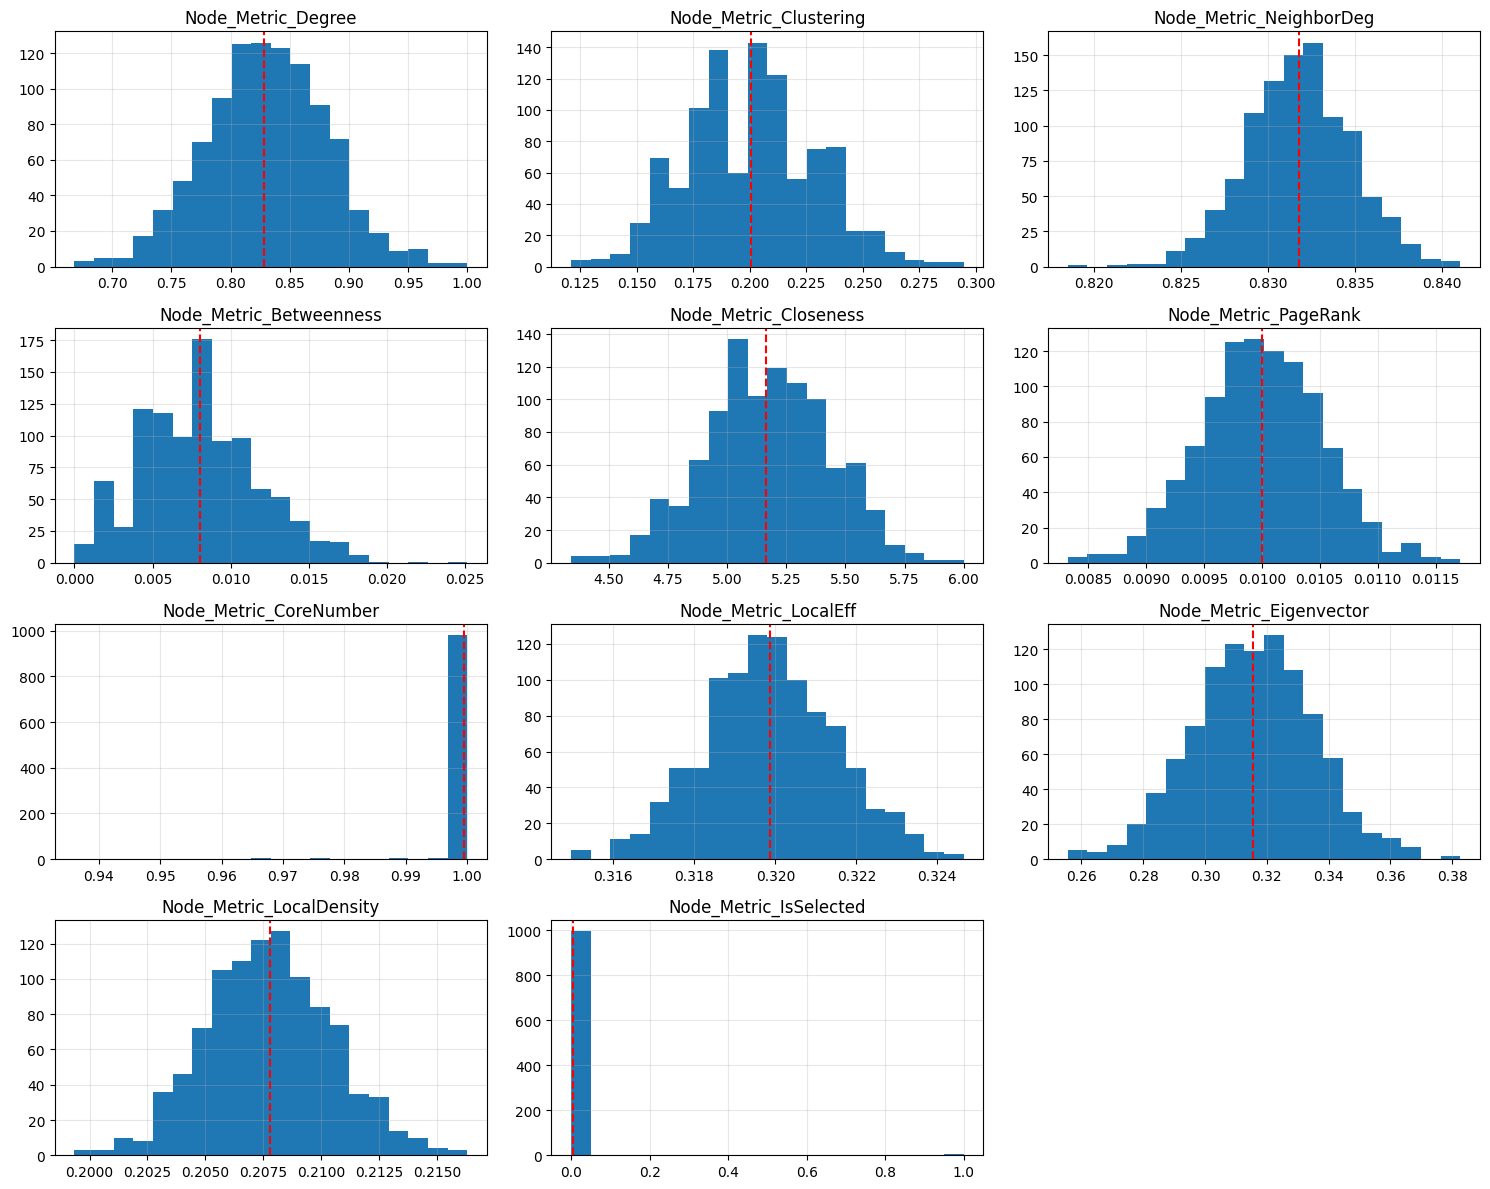


Visualizing Feature Pairs...
Using raw node features (higher variance expected)
Sampling 500 nodes from 1000 total

=== Spearman Correlation Rankings ===
Feature Pair                                       Correlation Abs Correlation
---------------------------------------------------------------------------
Node_Metric_Degree — Node_Metric_Eigenvector            0.9980          0.9980
Node_Metric_Degree — Node_Metric_PageRank               0.9979          0.9979
Node_Metric_PageRank — Node_Metric_Eigenvector            0.9921          0.9921
Node_Metric_LocalEff — Node_Metric_LocalDensity           0.9808          0.9808
Node_Metric_Degree — Node_Metric_Closeness              0.8953          0.8953
Node_Metric_Closeness — Node_Metric_PageRank               0.8940          0.8940
Node_Metric_Closeness — Node_Metric_Eigenvector            0.8931          0.8931
Node_Metric_NeighborDeg — Node_Metric_LocalEff               0.5315          0.5315
Node_Metric_NeighborDeg — Node_Metric_Local

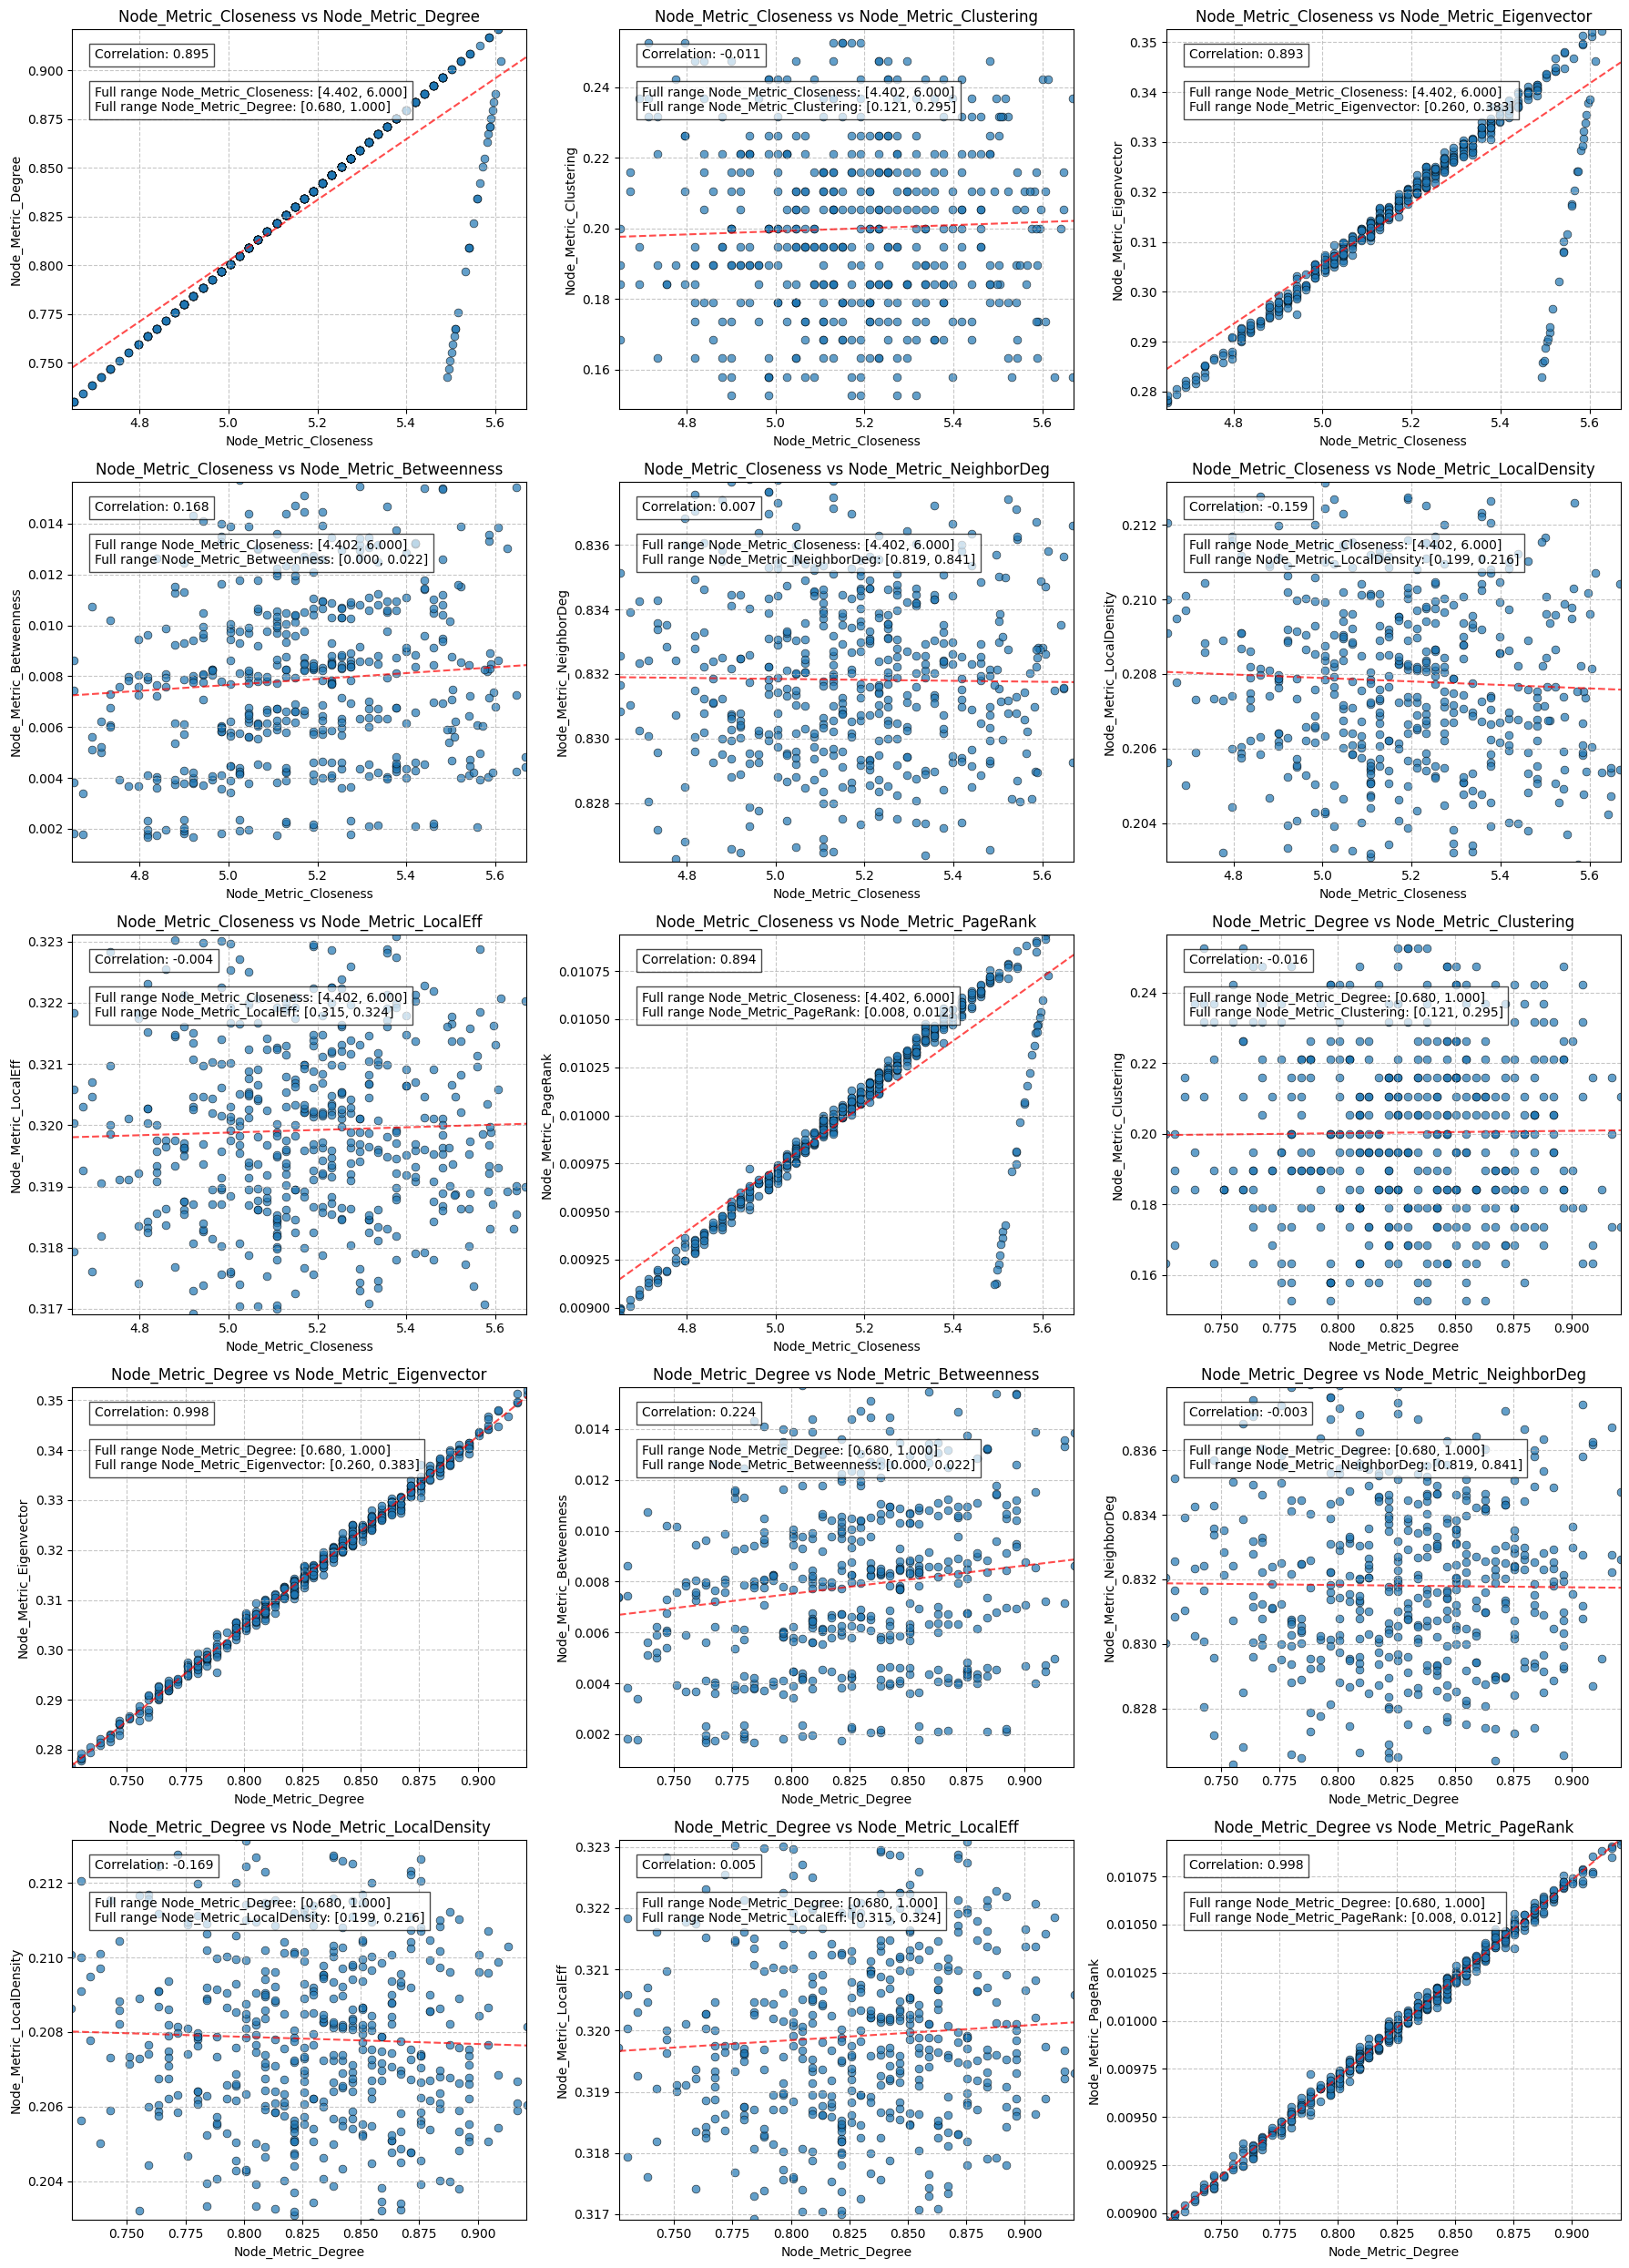

In [3]:
# Do visualization
Visualization.visualize_results(losses, trained_model, test_data, target_feature, feature_stats)
# Visualization.visualize_feature_redundancy(feature_stats)
feature_stats_df = Visualization.visualize_feature_statistics(train_data, show_histograms=True)
Visualization.visualize_feature_pairs(train_data, num_pairs=15, prioritize_variance=True, use_node_features=True)  # Plot 5 random feature pairs